# Módulo Streamlit

## 01. Iniciando um projeto de Data Science

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
caminho_2019 = '../dados/obitos-2019.csv'
caminho_2020 = '../dados/obitos-2020.csv'

dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

print(f'2019 dimensão: {dados_2019.shape}')
print(f'2020 dimensão: {dados_2020.shape}')

2019 dimensão: (12387, 6)
2020 dimensão: (14938, 6)


In [11]:
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,55
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [13]:
dados_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
9770,RR,INSUFICIENCIA_RESPIRATORIA,HOSPITAL,70 - 79,M,12
5881,MG,INSUFICIENCIA_RESPIRATORIA,OUTRO,50 - 59,M,7
8361,SP,PNEUMONIA,HOSPITAL,60 - 69,F,2924
3707,RS,OUTRAS,VIA_PUBLICA,30 - 39,F,6
9880,SC,COVID,DOMICILIO,70 - 79,M,16


In [15]:
x = dados_2020.groupby(['uf', 'tipo_doenca'])['total'].sum()
x.loc['SP', 'COVID']

51980

In [17]:
len(dados_2020['uf'].unique())

27

In [19]:
dados_2020['tipo_doenca'].unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [21]:
# Desafio 02
obitos_por_doenca_2019 = dados_2019.groupby(['tipo_doenca'])['total'].sum()
obitos_por_doenca_2019.sort_values(ascending=False)

tipo_doenca
OUTRAS                        660927
PNEUMONIA                     226380
SEPTICEMIA                    175548
INSUFICIENCIA_RESPIRATORIA    100635
INDETERMINADA                   6990
SRAG                            1498
COVID                              1
Name: total, dtype: int64

In [23]:
# Desafio 02
obitos_por_doenca_2020 = dados_2020.groupby(['tipo_doenca'])['total'].sum()
obitos_por_doenca_2020.sort_values(ascending=False)

tipo_doenca
OUTRAS                        691305
COVID                         195959
PNEUMONIA                     182218
SEPTICEMIA                    163019
INSUFICIENCIA_RESPIRATORIA     99070
SRAG                           16576
INDETERMINADA                   9719
Name: total, dtype: int64

### Desafio 01: Acessar o portal e verificar como são classificados os dados.

- UF
- Tipo de doença
- Local de óbito
- Faixa etária
- Sexo

### Desafio 02 - Nesta aula o Thiago quer fazer uma contagem dos números de casos, mas os dados não parecem corretos. Identifique o problema antes de seguir para o próximo vídeo e ajude a corrigir (feito).

## 02. Exploração dos dados

In [25]:
proporcao = obitos_por_doenca_2020/obitos_por_doenca_2019
proporcao

tipo_doenca
COVID                         195959.000000
INDETERMINADA                      1.390415
INSUFICIENCIA_RESPIRATORIA         0.984449
OUTRAS                             1.045963
PNEUMONIA                          0.804921
SEPTICEMIA                         0.928629
SRAG                              11.065421
Name: total, dtype: float64

In [27]:
def grafico_comparativo(causa):
    total_2019 = dados_2019.groupby(['tipo_doenca'])['total'].sum()
    total_2020 = dados_2020.groupby(['tipo_doenca'])['total'].sum()
    lista = [total_2019.loc[causa], total_2020.loc[causa]]

    dados = pd.DataFrame({'Total' : lista,
                          'Ano' : [2019, 2020]})

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Ano', y='Total', data=dados)
    plt.title(f'Número de óbitos por {causa}')
    plt.show()

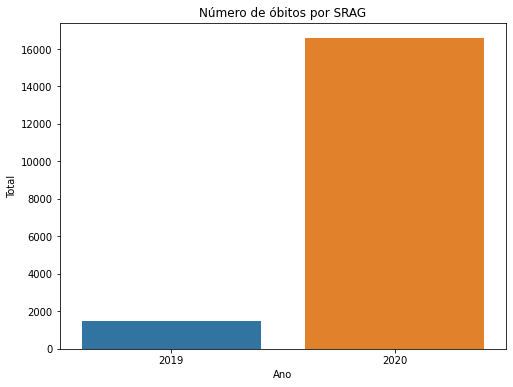

In [29]:
grafico_comparativo('SRAG')

### Desafio 01 - Nesta análise trabalhamos apenas com a informação de óbito, agora queremos que você explore as outras informações da base de dados para enriquecer mais sua aplicação final. Veja o que descobre de interessante e compartilhe no Discord.

In [31]:
dados_2020.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,12
2,AC,OUTRAS,HOSPITAL,< 9,F,47
3,AC,OUTRAS,HOSPITAL,< 9,M,45
4,AC,OUTRAS,OUTRO,< 9,F,4


In [33]:
covid_srag = ['COVID', 'SRAG']
dados_2020_covid_srag = dados_2020.query('tipo_doenca in @covid_srag')

In [35]:
def grafico_covid_srag(variavel_desejada, local='BRASIL'):
    dados = dados_2020_covid_srag.copy()

    if local != 'BRASIL':
        dados = dados.query('uf == @local')

    dados = dados.groupby(['tipo_doenca', variavel_desejada], 
                          as_index=False)['total'].sum()

    plt.figure(figsize=(10, 8))
    sns.barplot(y=variavel_desejada, x='total', hue='tipo_doenca', data=dados)
    plt.title(f'Número de óbitos por COVID e SRAG x {variavel_desejada} - {local}')
    plt.show()

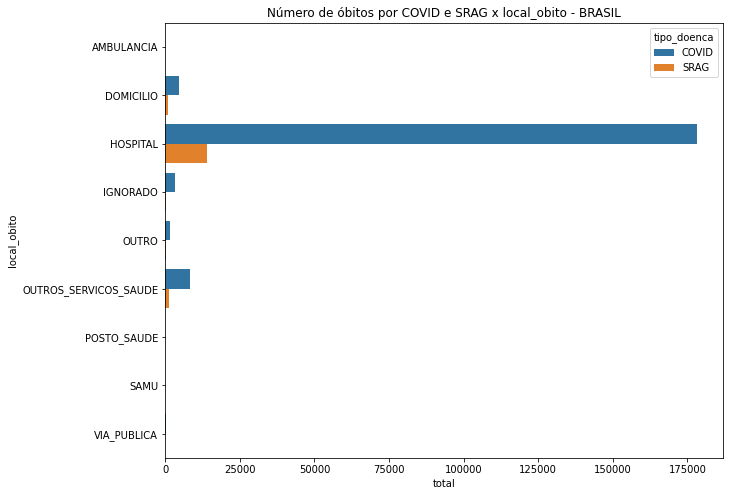

In [37]:
grafico_covid_srag('local_obito')

- A maior parte dos óbitos por COVID e SRAG no Brasil foram em hospitais.

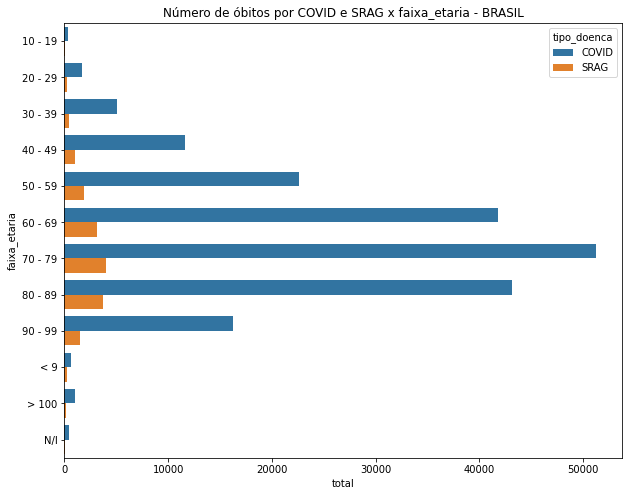

In [39]:
grafico_covid_srag('faixa_etaria')

- Percebe-se que a faixa mais afetada pelo novo coronavirus é a dos idosos, além de que, o maior número de óbitos por COVID e SRAG aconteceu na faixa dos 70 a 79 anos.

### Desafio 02 - Que tal deixar a função que criamos para gerar os gráficos ainda melhor, acrescente um filtro para pode selecionar o estado que gostaria de visualizar.

In [41]:
def grafico_comparativo(causa, estado = 'BRASIL'):

    if estado == 'BRASIL':
        total_2019 = dados_2019.groupby(['tipo_doenca'])['total'].sum()
        total_2020 = dados_2020.groupby(['tipo_doenca'])['total'].sum()

        lista = [total_2019.loc[causa], total_2020.loc[causa]]

    else:
        total_uf_2019 = dados_2019.groupby(['uf', 'tipo_doenca'])['total'].sum()
        total_uf_2020 = dados_2020.groupby(['uf', 'tipo_doenca'])['total'].sum()

        lista = [total_uf_2019.loc[estado, causa], total_uf_2020.loc[estado, causa]]

    dados = pd.DataFrame({'Total' : lista,
                          'Ano' : [2019, 2020]})

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Ano', y='Total', data=dados)
    plt.title(f'Número de óbitos por {causa} - {estado}')
    plt.show()

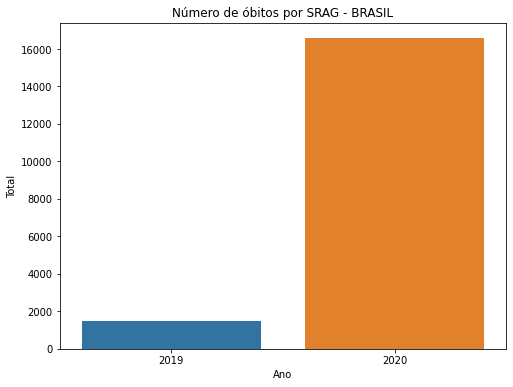

In [43]:
grafico_comparativo('SRAG')

### Desafio 03 - Como você sabe neste curso vamos aprender como criar uma aplicação web para ciência de dados com o Streamlit, que é uma ferramenta de alto nível abstraindo muitas coisas. Entender, mesmo que superficialmente, como uma aplicação-web funciona é interessante para você conhecer o que está acontecendo por baixo dos panos do Streamlit, por isso queremos que você pesquise um pouco sobre como funciona o Web. [Neste vídeo](https://www.youtube.com/watch?v=kDy62zaCHZE) o Sérgio Lopes, CTO da Alura, faz uma explicação geral de como as coisas acontecem em uma aplicação.

### Desafio 04 - A função que melhoramos no vídeo 2.3 da para ficar ainda melhor, agora queremos que você acrescente a opção de selecionar apenas o estado e visualizar os totais de óbitos.

In [45]:
def grafico_comparativo(estado = 'BRASIL', causa = None):

    if causa == None:
        titulo = f'Número de óbitos por doenças - {estado}'

        if estado == 'BRASIL':
            lista = [dados_2019['total'].sum(), dados_2020['total'].sum()]

        else:
            estado = estado
            lista = [dados_2019.query('uf == "SP"')['total'].sum(), 
                     dados_2020.query('uf == "SP"')['total'].sum()]

    else:
        titulo = f'Número de óbitos por {causa} - {estado}'

        if estado == 'BRASIL':
            total_2019 = dados_2019.groupby(['tipo_doenca'])['total'].sum()
            total_2020 = dados_2020.groupby(['tipo_doenca'])['total'].sum()

            lista = [total_2019.loc[causa], total_2020.loc[causa]]

        else:
            total_uf_2019 = dados_2019.groupby(['uf', 'tipo_doenca'])['total'].sum()
            total_uf_2020 = dados_2020.groupby(['uf', 'tipo_doenca'])['total'].sum()

            lista = [total_uf_2019.loc[estado, causa], total_uf_2020.loc[estado, causa]]

    dados = pd.DataFrame({'Total' : lista,
                          'Ano' : [2019, 2020]})

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Ano', y='Total', data=dados)
    plt.title(titulo)
    plt.show()

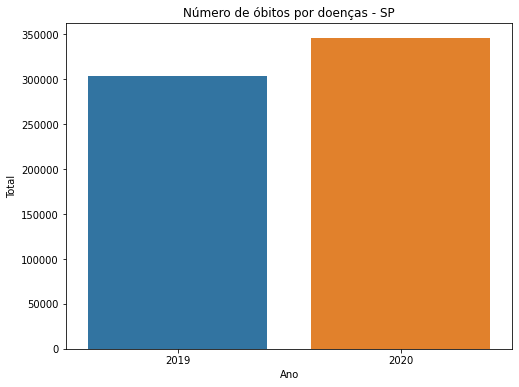

In [47]:
grafico_comparativo('SP')

## 03. Criando a primeira aplicação-web

### Desafio 01 - Nesta aula criamos nossa primeira aplicação com o Streamlit e nosso desafio é que você explore a documentação da ferramenta, entre nos códigos fontes (github) dos exemplos, explore os métodos e afins.

## 04. Streamlit: Avançando na aplicação

### Desafio 01 - Na aula passada pedimos para você explorar a documentação, agora queremos que dê uma olhada nos chamados comandos mágicos do streamlit, como funciona e compartilhe conosco as vantagens e desvantagens que você identificou.

### Desafio extra - Não deixe de ir reproduzindo o código que estamos desenvolvendo na aula para você exercitar e realizar os testes dessa nova ferramenta.